# Part 3: Clicks by Weekday, Hour of Day, and Country

## Hypothesis

My hypothesis is, that the number of clicks is not equal for each day of the week, and during the hours of a day.
We evaluate this hypthesis with some visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np

warnings.filterwarnings('ignore')

## Reduce Data

In the last step, we have alreade reduced our data only to records with "clicked" newsletters. I further reduce it to get a handy subsample for a first evaluation of the hypotheses.

- take the first 100.000 entries, 
- drop personal data
- keep only 'click' and 'sent' columns
- extract day of week and write to new column

In [2]:
filename = os.listdir('..\\data\\2018')[0]

reader = pd.read_csv(os.path.join('..\\data\\2018', filename), chunksize=100000)
df = next(reader)

In [3]:
df = df.drop(columns=['user.Email', 'user.MobileNumber', 'user.LastName'])

col_filter =[a or b for (a,b) in zip(df.columns.str.contains('click'),df.columns.str.contains('sent'))]
col_filter[df.columns.get_loc('user.ISOCountryCode')] = True
df = df.loc[:,col_filter]

df['click.DayOfWeek'] = pd.to_datetime(df['click.Timestamp']).dt.dayofweek
df['sent.DayOfWeek'] = pd.to_datetime(df['record.sentToMTA.Timestamp']).dt.dayofweek
df.head()

,sentToMTA.Timestamp,sentToMTA.ExternalTransactionId,sentToMTA.SendoutChannel,click.Timestamp,click.Link.Id,click.Link.Category.Id,click.Link.Category.Name,click.Link.Url,click.Link.SystemLinkType,click.Link.Type,...,click.UserAgent.Platform,click.UserAgent.OperatingSystem,click.UserAgent.OperatingSystemVersion,click.UserAgent.ClientName,click.UserAgent.ClientVersion,click.UserAgent.RawString,record.sentToMTA.Timestamp,user.ISOCountryCode,click.DayOfWeek,sent.DayOfWeek
0,NaN,NaN,EMAIL,2018-01-08T08:47:54Z,32.0,0.0,0,https://www.swarovski.com/unsubscribe?utm_camp...,NaN,NORMAL,...,desktop,Windows,7.0,Chrome,57.0,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,2018-01-04T22:00:15Z,AU,0,3.0
1,NaN,NaN,EMAIL,2018-01-08T08:47:43Z,32.0,0.0,0,https://www.swarovski.com/unsubscribe?utm_camp...,NaN,NORMAL,...,desktop,Windows,10.0,Chrome,63.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2018-01-04T22:00:15Z,AU,0,3.0
2,NaN,NaN,EMAIL,2018-07-03T08:23:40Z,8.0,0.0,0,https://www.swarovski.com/sale?utm_campaign=18...,NaN,NORMAL,...,mobile,Android,8.0,Chrome,67.0,Mozilla/5.0 (Linux; Android 8.0.0; G3121 Build...,2018-07-03T08:04:03Z,DE,1,1.0
3,NaN,NaN,EMAIL,2018-07-03T08:18:09Z,8.0,0.0,0,https://www.swarovski.com/sale?utm_campaign=18...,NaN,NORMAL,...,mobile,Android,8.0,Chrome,67.0,Mozilla/5.0 (Linux; Android 8.0.0; G3121 Build...,2018-07-03T08:04:03Z,DE,1,1.0
4,NaN,NaN,EMAIL,2018-07-09T08:49:16Z,8.0,0.0,0,https://www.swarovski.com/sale?utm_campaign=18...,NaN,NORMAL,...,tablet,Apple iOS,11.0,Safari,11.0,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2018-07-09T08:05:47Z,DE,0,0.0


## Click Distribution by Weekdays

In [4]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

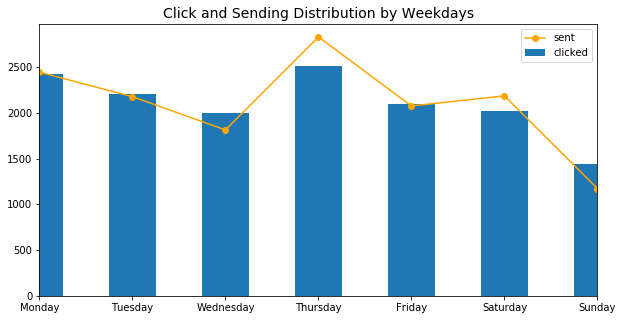

In [5]:
df2 = df.loc[:,df.columns.str.contains('DayOfWeek')]

counts = df['click.DayOfWeek'].value_counts()
counts.sort_index(inplace=True)
counts.index

counts2 = df['sent.DayOfWeek'].value_counts()
counts2.sort_index(inplace=True)
counts2.index

df3 = pd.concat([counts, counts2], axis=1)
df3.index = weekdays
df3['click.DayOfWeek'].plot(kind='bar', figsize=(10,5), label='clicked')
df3['sent.DayOfWeek'].plot(marker='o', c='orange', label='sent')
plt.legend()
plt.title('Click and Sending Distribution by Weekdays', fontsize=14);

We see that on Thursday, we had the most clicks, and on Sunday the least. The weekday on which a newsletter has been clicked, depends of course on the day on which it has been sent. That's why I added a line which shows the distribution of sending dates over weekdays. It shows, that on Thursday we do not only have the most clicks, but also the most sent newsletters. Nevertheless we can conclude, the sunday is in general not suitable for newsletter sendouts.

## Click Distribution by Hour of Day

Text(0.5, 1.0, 'Distribtion of Clicks over the hours of a day')

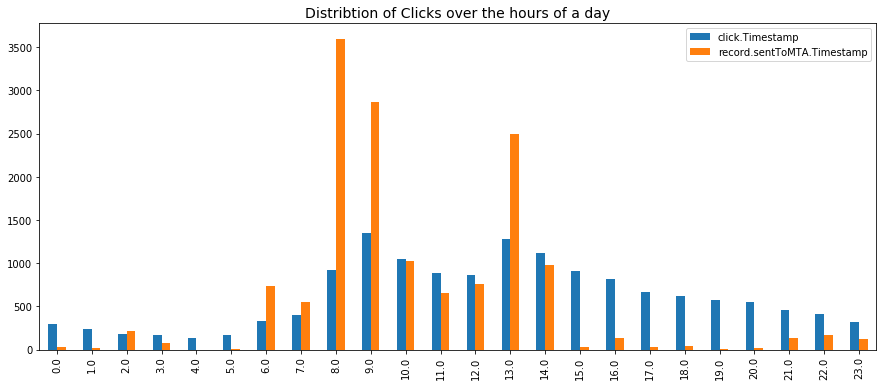

In [7]:
hour = pd.to_datetime(df['click.Timestamp']).dt.hour
hour_counts = hour.value_counts()
hour_counts.sort_index(inplace=True)

hour2 = pd.to_datetime(df['record.sentToMTA.Timestamp']).dt.hour
hour_counts2 = hour2.value_counts()
hour_counts2.sort_index(inplace=True)

df3 = pd.concat([hour_counts, hour_counts2], axis=1)
df3.plot(kind='bar', figsize=(15,6));
plt.title('Distribtion of Clicks over the hours of a day', fontsize=14)

We can see click peaks around 9 and 13. If the timestamps are all utc times (what we do not know), the peak at 13 could be caused by regions in america and would correspond more or less to to peak at 9 in europe.

Like above, also in this case the distribution of sending times is show in addition to the distribution of click times. Here I chose to display both as bar charts, though.

## Assumption

I assume all timestamps are given as UTC timestamps. To verify this assumption, I take a look at the contries with the most clicks.

### Number of clicks by user country

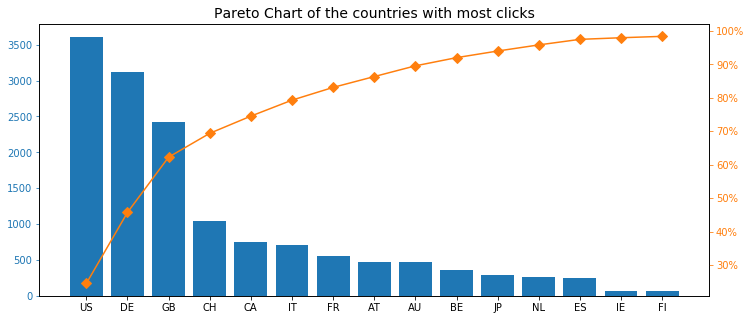

In [10]:
from matplotlib.ticker import PercentFormatter

country_counts = df['user.ISOCountryCode'].value_counts()
df2 = pd.DataFrame(country_counts)
df2.columns = ['count']
df2["cumpercentage"] = df2["count"].cumsum()/df2["count"].sum()*100
df2 = df2.iloc[:15,:]

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(df2.index, df2["count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df2.index, df2["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Pareto Chart of the countries with most clicks', fontsize=14)
plt.show()

The countries in which we have the most clicks are the US, Germany and Great Britain. I create separate dataframes for each of these three contries.

In [12]:
df_US = df[df['user.ISOCountryCode']=='US']
df_DE = df[df['user.ISOCountryCode']=='DE']
df_GB = df[df['user.ISOCountryCode']=='GB']

### Hour of Day: US

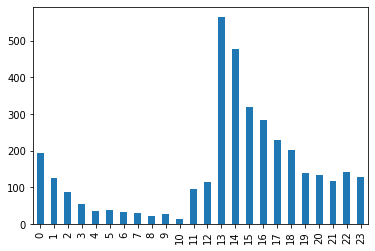

In [13]:
hour_us = pd.to_datetime(df_US['click.Timestamp']).dt.hour
hour_counts_us = hour_us.value_counts()
hour_counts_us.sort_index(inplace=True)
hour_counts_us.plot(kind='bar');

### Hour Of Day: DE

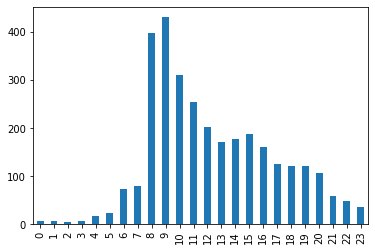

In [14]:
hour_de = pd.to_datetime(df_DE['click.Timestamp']).dt.hour
hour_counts_de = hour_de.value_counts()
hour_counts_de.sort_index(inplace=True)
hour_counts_de.plot(kind='bar');

### Hour of Day: GB

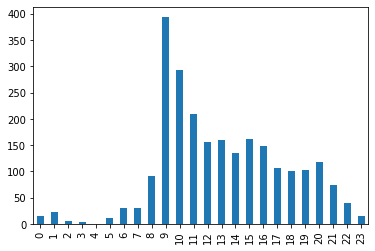

In [15]:
hour_gb = pd.to_datetime(df_GB['click.Timestamp']).dt.hour
hour_counts_gb = hour_gb.value_counts()
hour_counts_gb.sort_index(inplace=True)
hour_counts_gb.plot(kind='bar')

### In a single chart

In [16]:
df3 = pd.concat([hour_counts_gb, hour_counts_de, hour_counts_us], axis=1)
df3.columns=['GB','DE','US']

Text(0, 0.5, 'Number of Clicks')

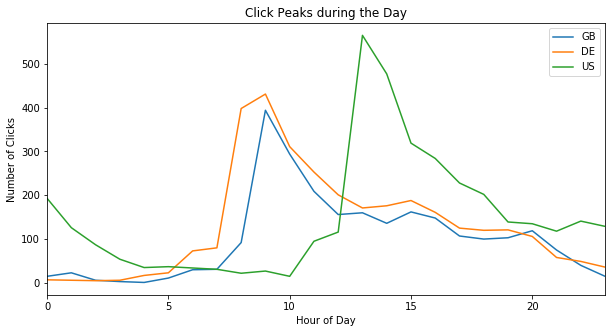

In [17]:
ax = df3.plot(figsize=(10,5), title='Click Peaks during the Day');
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Clicks')

These charts confirm the assumption. In the US we have most clicks around 13, 14 o'clock UTC, which corresponds to the morning hours.

## Conclusion

We have the most newsletter clicks during the morning hours. We have to consider though, that this is probably influenced by the fact that a vast majority of the newsletters gets also sent in the morning. It would be interesting to investigate how the distribution changes, if we change the sendout time of the emails to the afternoon.

For this purpose one could create a subsample of emails sent during the afternoon, and visualize again the distribution of click hours.